In [1]:
# coding = utf-8
# author = cwandrews

# TODO Add docstrings
# TODO Change read_in functions to generators?
# TODO Add testing via pytest
# urls *Maybe?


TARGET_STRING = 'This is? my file.\nIt is alright I suppose...\nThis is !really! just a test.\nI hope it, works'
TARGET_STRING2 = 'This is just another string but longer and with no newlines to test the read_in_string method. is is.'
# Target text to be read (Frankenstein)
TARGET_FILE = './static_files/pg83.txt'
TARGET_FILE2 = './static_files/pg84.txt'
TEST_TXT = './static_files/test.txt'
DOES_NOT_EXIST = './static_files/fake.txt'

# 230k+ words from the standard UNIX dict in a local text file ('/usr/share/dict/words')
ENGLISH_WORDS = './static_files/english_words.txt'


class WordCounter:
    """
    Read text from string or text file, counts words, and returns sorted list of tuples with the n most common words
    and their respective counts.
    """

    @staticmethod
    def _char_counter(sanitized_text_gen, num_words=10):
        from types import GeneratorType
        from collections import Counter

        assert isinstance(sanitized_text_gen, GeneratorType)

        with open(ENGLISH_WORDS, 'rt') as eng_dict:
            english_dict = list(set([eng_word.lower().rstrip('\n') for eng_word in eng_dict.readlines()]))

        master_word_count = Counter()

        for w_line in sanitized_text_gen:
            master_word_count.update(Counter(w_line.split()))

        master_word_list = [word for word in master_word_count.most_common(num_words) if word[0] in english_dict]
        master_word_list.sort(key=lambda wc: wc[1], reverse=True)

        return master_word_list[:num_words]
    
    @staticmethod
    def __sanitize(string_list):
        """
        Performs additional processing (sanitzation) of text. Will strip white space from start and end of string,
        remove special characters, downcase all letters, replace any white space w/single space. Private method
        utilized by class methods.
        """
        import re

        assert isinstance(string_list, list)

        white_space_re = re.compile("\s+")
        special_chars_re = re.compile("[-\"\':;.?!,\(\)\d]+")

        trimmed_text = [w_line.strip() for w_line in string_list if w_line]
        extra_ws_processed_text = [white_space_re.sub(' ', w_line) for w_line in trimmed_text]
        spec_char_killer_processed_text = [special_chars_re.sub('', w_line) for w_line in extra_ws_processed_text]
        sanitized_text = [w_line.lower() for w_line in spec_char_killer_processed_text]

        assert isinstance(sanitized_text, list)
        for sanitized_line in sanitized_text:
            yield sanitized_line

    def read_in_string(self, string, length):
        import re

        assert isinstance(string, str)

        new_line_re = re.compile("[\n\r]")

        if new_line_re.search(string):
            chunked_text = new_line_re.split(string)
        else:
            chunked_text = [string]

        assert isinstance(chunked_text, list)
        return self._char_counter(self.__sanitize(chunked_text), length)

    def read_in_file(self, filepath, length):
        from os.path import exists, isfile

        assert exists(filepath) and isfile(filepath)

        with open(filepath, 'rt') as infile:
            import re

            gberg_split_re = re.compile("\n{10}")
            new_line_re = re.compile("[\n\r]")

            read_text = infile.read()

            if ("GUTENBERG" in read_text) and gberg_split_re.search(read_text):
                working_text = gberg_split_re.split(read_text)[1]
            else:
                working_text = read_text

            if new_line_re.search(working_text):
                chunked_text = new_line_re.split(working_text)
            else:
                chunked_text = [working_text]

        assert isinstance(chunked_text, list)
        return self._char_counter(self.__sanitize(chunked_text), length)


class LetterCounter(WordCounter):

    @staticmethod
    def _char_counter(sanitized_text_gen, num_letters=10):
        from types import GeneratorType
        from collections import Counter
        import re

        assert isinstance(sanitized_text_gen, GeneratorType)

        english_letters = re.compile("[a-z]")

        master_letter_count = Counter()

        for w_line in sanitized_text_gen:
            ns_w_line = list(''.join(w_line))
            master_letter_count.update(Counter(ns_w_line))

        master_letter_list = [letter for letter in master_letter_count.most_common(
            num_letters) if english_letters.match(letter[0])]

        master_letter_list.sort(key=lambda lc: lc[1], reverse=True)

        return master_letter_list[:num_letters]



In [7]:
wc = WordCounter().read_in_file(TARGET_FILE, 10)

In [8]:
wc

[('the', 7785),
 ('of', 3967),
 ('to', 2284),
 ('and', 2022),
 ('a', 1790),
 ('in', 1430),
 ('it', 1142),
 ('that', 1043),
 ('was', 970),
 ('is', 761)]

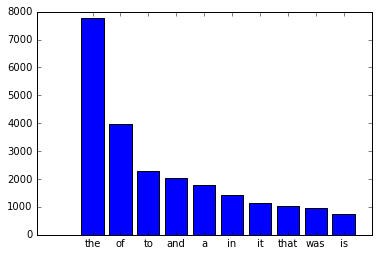

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict

wordsdict = OrderedDict()
for w in wc:
    wordsdict[w[0]] = w[1]

plt.bar(range(len(wordsdict)), wordsdict.values(), align='center')
plt.xticks(range(len(wordsdict)), wordsdict.keys())

plt.show()